# 네이버 영화 평점 분석

In [145]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [146]:
# plot 시 한글이 깨지는 현상 방지!

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!') 

##### 2019년 의 영화 평점 데이터를 가져옵니다.

In [11]:
import time

date = pd.date_range('20190101', periods=365, freq='D')

movie_date = []
movie_name = []
movie_point = []

for today in tqdm(date):
    html = "http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])
    time.sleep(1)

  5%|████▍                                                                            | 20/365 [01:13<21:21,  3.71s/it]

KeyboardInterrupt: 

In [12]:
movie = pd.read_csv('./data/2019년 네이버 영화 평점 리스트.csv')

In [13]:
movie.head()

,date,name,point
0,2019-01-01,보헤미안 랩소디,9.49
1,2019-01-01,헌터 킬러,9.43
2,2019-01-01,폴란드로 간 아이들,9.42
3,2019-01-01,트루먼 쇼,9.32
4,2019-01-01,점박이 한반도의 공룡2 : 새로운 낙원,9.24


In [67]:
# 인터넷의 문제로 미리 수집된 데이터를 이용합니다.
# 2019년 네이버 영화 평점 리스트를 movie 변수로 불러옵니다.
movie = pd.read_csv('./data/2019년 네이버 영화 평점 리스트.csv')
movie.head()

,date,name,point
0,2019-01-01,보헤미안 랩소디,9.49
1,2019-01-01,헌터 킬러,9.43
2,2019-01-01,폴란드로 간 아이들,9.42
3,2019-01-01,트루먼 쇼,9.32
4,2019-01-01,점박이 한반도의 공룡2 : 새로운 낙원,9.24


In [21]:
# 데이터 프레임의 컬럼 정보를 확인합니다.
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16011 entries, 0 to 16010
Data columns (total 3 columns):
date     16011 non-null datetime64[ns]
name     16011 non-null object
point    16011 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 375.4+ KB


In [20]:
# date 컬럼을 datetime 타입으로 변경합니다.
movie['date']= pd.to_datetime(movie['date'])

In [23]:
list(movie)

['date', 'name', 'point']

In [24]:
# 영화별 평점 평균을 계산합니다.
movie.groupby('name')['point'].mean()

name
0.0MHz          5.604231
1919 유관순        8.449024
28일 후           7.906774
47미터 2          7.244756
4월 이야기          8.190000
                  ...   
호텔 뭄바이          9.318500
홀리 모터스          7.560294
황혼에서 새벽까지       8.080385
히트              9.100000
힘을 내요, 미스터 리    7.601077
Name: point, Length: 494, dtype: float64

In [36]:
# 평균 평점이 높은 10개 영화를 시각화합니다.
top10 = movie.groupby('name')['point'].mean().sort_values(ascending = False).head(10)

In [50]:
top10 = pd.DataFrame(top10)
top10 = top10.reset_index()

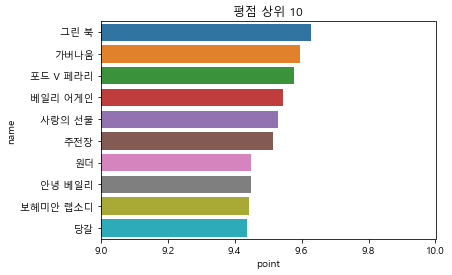

In [66]:
ax = sns.barplot( x = 'point',y = 'name', data=top10).set(xlim=(9,10))
plt.title("평점 상위 10")
plt.show()

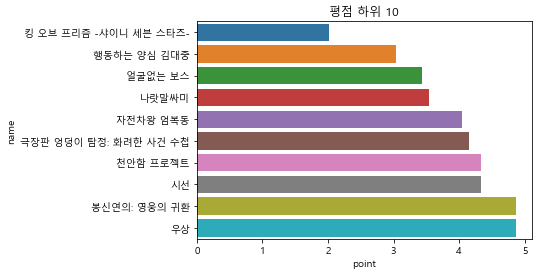

In [68]:
# 평균 평점이 낮은 10개 영화를 시각화합니다.
bottom10 = movie.groupby('name')['point'].mean().sort_values(ascending = True).head(10)
bottom10 = pd.DataFrame(bottom10)
bottom10 = bottom10.reset_index()
ax = sns.barplot( x = 'point',y = 'name', data=bottom10).set()
plt.title("평점 하위 10")
plt.show()

In [70]:
# 영화별 평점 건수(리뷰 요일)를 계산합니다.
movie.groupby('name')['point'].count().to_frame()

,point
name,
0.0MHz,26
1919 유관순,82
28일 후,31
47미터 2,82
4월 이야기,19
...,...
호텔 뭄바이,40
홀리 모터스,34
황혼에서 새벽까지,26


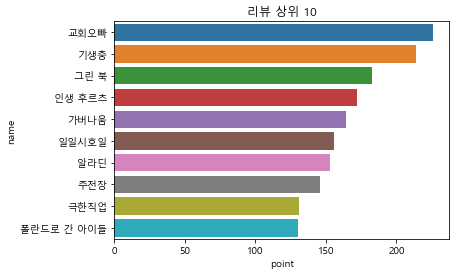

In [80]:
# 평점 건수(리뷰 요일)가 높은 10개 영화를 시각화합니다.
hit10 = movie.groupby('name')['point'].count().sort_values(ascending = False).to_frame().head(10)
hit10 = pd.DataFrame(hit10)
hit10 = hit10.reset_index()
ax = sns.barplot( x = 'point',y = 'name', data=hit10).set()
plt.title("리뷰 상위 10")
plt.show()

In [82]:
# 평균 평점이 높은 순서대로 영화 정보를 추출합니다.
tmp = top10['name']
tmp

0        그린 북
1        가버나움
2    포드 V 페라리
3     베일리 어게인
4      사랑의 선물
5         주전장
6          원더
7      안녕 베일리
8    보헤미안 랩소디
9          당갈
Name: name, dtype: object

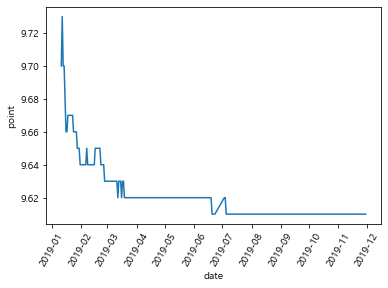

In [96]:
# 평균 평점 1위 영화의 평점 변화를 시각화합니다.
df = movie[movie.name == top10.name[0]]
sns.lineplot(x = 'date', y = 'point', data = df)
plt.xticks(rotation=60)
plt.show()

In [98]:
# 모든 영화에 대해 날짜별 평점 변화를 계산합니다.
pd.pivot_table(movie, values = 'point', index = 'date', columns = 'name')

name,0.0MHz,1919 유관순,28일 후,47미터 2,4월 이야기,500일의 썸머,7년-그들이 없는 언론,7번방의 선물,80일간의 세계일주,82년생 김지영,...,헬보이,현기증,혈투,호두까기 인형과 4개의 왕국,호랑이보다 무서운 겨울손님,호텔 뭄바이,홀리 모터스,황혼에서 새벽까지,히트,"힘을 내요, 미스터 리"
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,8.52,NaN,NaN,NaN,...,NaN,NaN,NaN,7.39,NaN,NaN,NaN,NaN,9.1,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,8.52,NaN,NaN,NaN,...,NaN,NaN,NaN,7.40,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.40,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.40,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.40,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# 평점이 없는 경우 (na의 경우) 0으로 치환합니다.

pd.pivot_table(movie, values = 'point', index = 'date', columns = 'name').fillna(0)

name,0.0MHz,1919 유관순,28일 후,47미터 2,4월 이야기,500일의 썸머,7년-그들이 없는 언론,7번방의 선물,80일간의 세계일주,82년생 김지영,...,헬보이,현기증,혈투,호두까기 인형과 4개의 왕국,호랑이보다 무서운 겨울손님,호텔 뭄바이,홀리 모터스,황혼에서 새벽까지,히트,"힘을 내요, 미스터 리"
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0.0,0.0,0.0,0.0,0.0,0.0,8.52,0.0,0.0,0.00,...,0.0,0.0,0.0,7.39,0.0,0.0,0.0,0.0,9.1,0.0
2019-01-02,0.0,0.0,0.0,0.0,0.0,0.0,8.52,0.0,0.0,0.00,...,0.0,0.0,0.0,7.40,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,7.40,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,7.40,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,7.40,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,6.69,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,6.69,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,6.69,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.pivot_table(movie, values = 'point', index = 'date', columns = 'name').fillna(0)

In [141]:
df = pd.pivot_table(movie, values = 'point', index = 'date', columns = 'name').fillna(0)[top10.name[0:3]]

In [160]:
df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=365, freq=None)

In [163]:
df_melt = df.melt()

In [173]:
df_melt['date'] = list(df.index)*3
df_melt

,name,value,date
0,그린 북,0.00,2019-01-01
1,그린 북,0.00,2019-01-02
2,그린 북,0.00,2019-01-03
3,그린 북,0.00,2019-01-04
4,그린 북,0.00,2019-01-05
...,...,...,...
1090,포드 V 페라리,9.57,2019-12-27
1091,포드 V 페라리,9.57,2019-12-28
1092,포드 V 페라리,9.57,2019-12-29
1093,포드 V 페라리,9.57,2019-12-30


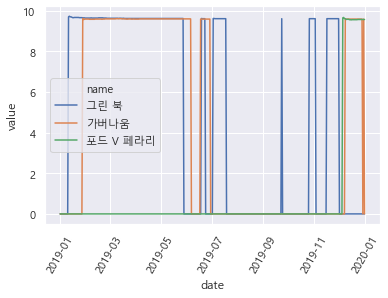

In [175]:
# 평균 평점 1위 에서 3위 까지 영화를 추출하여 시각화합니다.
sns.lineplot(x = 'date', y = 'value', hue = 'name', data = df_melt)
plt.xticks(rotation=60)
plt.show()

In [176]:
movie

,date,name,point
0,2019-01-01,보헤미안 랩소디,9.49
1,2019-01-01,헌터 킬러,9.43
2,2019-01-01,폴란드로 간 아이들,9.42
3,2019-01-01,트루먼 쇼,9.32
4,2019-01-01,점박이 한반도의 공룡2 : 새로운 낙원,9.24
...,...,...,...
16006,2019-12-31,대통령의 7시간,6.18
16007,2019-12-31,쥬만지: 넥스트 레벨,6.13
16008,2019-12-31,백두산,5.93
16009,2019-12-31,아내를 죽였다,5.18


In [123]:
# date 컬럼에서 년, 월, 일, 요일 정보를 추출합니다.
movie['month'] = movie.date[]

,date,name,point,year,month,day,wday,week
0,2019-01-01,보헤미안 랩소디,9.49,2019,1,1,1,1
1,2019-01-01,헌터 킬러,9.43,2019,1,1,1,1
2,2019-01-01,폴란드로 간 아이들,9.42,2019,1,1,1,1
3,2019-01-01,트루먼 쇼,9.32,2019,1,1,1,1
4,2019-01-01,점박이 한반도의 공룡2 : 새로운 낙원,9.24,2019,1,1,1,1
...,...,...,...,...,...,...,...,...
16006,2019-12-31,대통령의 7시간,6.18,2019,12,31,1,1
16007,2019-12-31,쥬만지: 넥스트 레벨,6.13,2019,12,31,1,1
16008,2019-12-31,백두산,5.93,2019,12,31,1,1
16009,2019-12-31,아내를 죽였다,5.18,2019,12,31,1,1


In [124]:
# 영화의 요일별 평균 평점을 계산합니다.


mean
name         wday          
0.0MHz       0     5.522500
             1     5.482500
             2     5.697500
             3     5.592500
             4     5.587500
...                     ...
힘을 내요, 미스터 리 2     7.585000
             3     7.619000
             4     7.613333
             5     7.602000
             6     7.602222

[3165 rows x 1 columns]

In [125]:
# 인덱스를 재설정합니다. reset_index함수 이용


,name,wday,mean
0,0.0MHz,0,5.522500
1,0.0MHz,1,5.482500
2,0.0MHz,2,5.697500
3,0.0MHz,3,5.592500
4,0.0MHz,4,5.587500
...,...,...,...
3160,"힘을 내요, 미스터 리",2,7.585000
3161,"힘을 내요, 미스터 리",3,7.619000
3162,"힘을 내요, 미스터 리",4,7.613333
3163,"힘을 내요, 미스터 리",5,7.602000


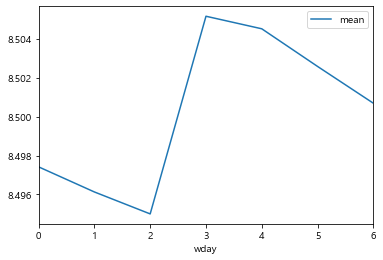

In [129]:
# "기생충" 영화의 요일별 평점을 시각화합니다.


In [130]:
# 영화의 주별 평균 평점을 계산합니다.


mean
name         week          
0.0MHz       22    6.026000
             23    5.844286
             24    5.515714
             25    5.235000
             26    5.118000
...                     ...
힘을 내요, 미스터 리 44    7.560000
             45    7.570000
             46    7.570000
             47    7.570000
             48    7.570000

[2902 rows x 1 columns]

In [141]:
# 인덱스를 재설정합니다. reset_index함수 이용


,name,week,mean
0,0.0MHz,22,6.026000
1,0.0MHz,23,5.844286
2,0.0MHz,24,5.515714
3,0.0MHz,25,5.235000
4,0.0MHz,26,5.118000
...,...,...,...
2897,"힘을 내요, 미스터 리",44,7.560000
2898,"힘을 내요, 미스터 리",45,7.570000
2899,"힘을 내요, 미스터 리",46,7.570000
2900,"힘을 내요, 미스터 리",47,7.570000


In [142]:
# 영화별 주차를 계산합니다.


name
교회오빠          33
기생충           32
그린 북          31
알라딘           28
가버나움          26
              ..
코코             1
꾸뻬씨의 행복여행      1
꿈의 제인          1
용호문            1
라스베가스를 떠나며     1
Length: 494, dtype: int64

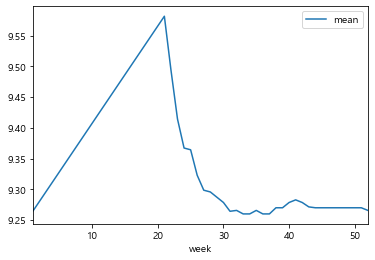

In [145]:
# "교회오빠" 영화의 요일별 평점을 시각화합니다.


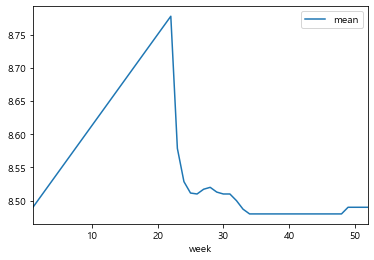

In [147]:
# "기생충" 영화의 요일별 평점을 시각화합니다.


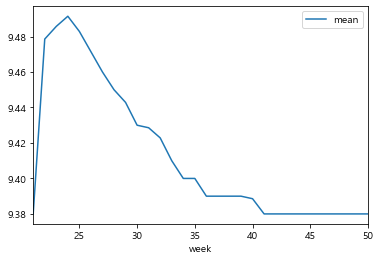

In [148]:
# "알라딘" 영화의 요일별 평점을 시각화합니다.


In [77]:
#  평균 평점 10위 영화의 이름을 추출합니다


Index(['그린 북', '가버나움', '포드 V 페라리', '베일리 어게인', '사랑의 선물', '주전장', '원더', '안녕 베일리',
       '보헤미안 랩소디', '당갈'],
      dtype='object', name='name')

In [79]:
#  평균 평점 10위 영화의 월별 평균 평점을 계산합니다.


mean
name     month          
가버나움     1      9.590000
         2      9.588929
         3      9.600000
         4      9.598333
         5      9.600000
         6      9.593333
         12     9.590000
그린 북     1      9.670476
         2      9.641429
         3      9.625161
         4      9.620000
         5      9.620000
         6      9.612000
         7      9.611250
         9      9.610000
         10     9.610000
         11     9.610000
당갈       5      9.430000
         8      9.440000
베일리 어게인  4      9.549286
         5      9.540000
보헤미안 랩소디 1      9.471935
         2      9.438571
         3      9.430000
         4      9.424348
사랑의 선물   9      9.660000
         10     9.513333
안녕 베일리   9      9.474286
         10     9.420000
원더       7      9.450000
주전장      8      9.532258
         9      9.533333
         10     9.515806
         11     9.492143
         12     9.490000
포드 V 페라리 12     9.576667

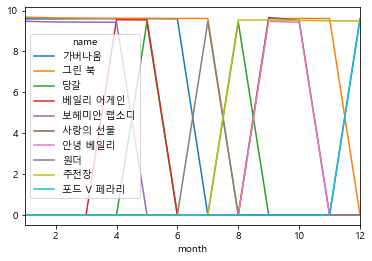

In [96]:
#  평균 평점 10위 영화의 월별 평균 평점을 시각화합니다.


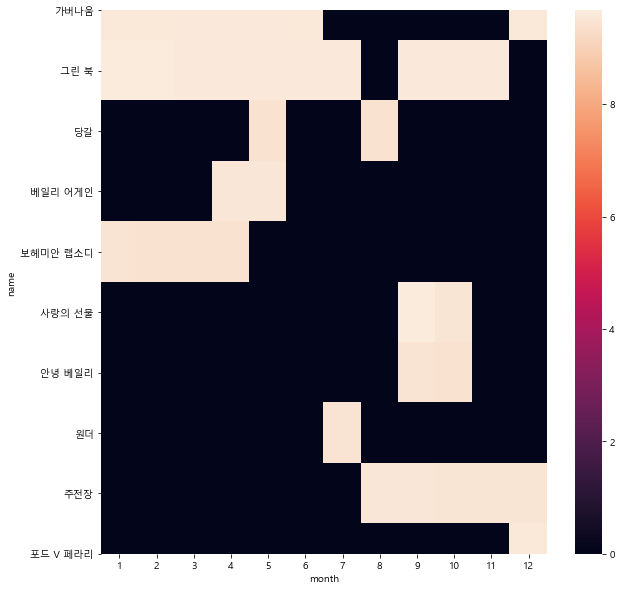

In [94]:
#  평균 평점 10위 영화의 월별 평균 평점을 시각화(heatmap)합니다.


In [178]:
import numpy as np

In [180]:
np.sum(np.array([[1,2,3],[4,5,6],[7,8,9]]), axis = 0)

array([12, 15, 18])

In [182]:
np.array([[1,2,3],[4,5,6],[7,8,9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [184]:
s = pd.DataFrame(np.array([[1,2,3],[4,5,6],[7,8,9]]))

In [185]:
s.sum(axis = 0)

0    12
1    15
2    18
dtype: int64

In [187]:
s.sum(axis = 1)

0     6
1    15
2    24
dtype: int64

In [196]:
[4,[5,6]]

[4, [5, 6]]

In [190]:
[0,1,[3]]

[0, 1, [3]]